In [1050]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import missingno as msno

In [1051]:
# Chargement des données
ins_prof_dut = pd.read_csv("../csv/fr-esr-insertion_professionnelle-dut_donnees_nationales.csv", sep=";")
ins_prof_lp = pd.read_csv("../csv//fr-esr-insertion_professionnelle-lp_donnees_nationales.csv", sep=";")
ins_prof_master = pd.read_csv("../csv/fr-esr-insertion_professionnelle-master_donnees_nationales.csv", sep=";")
ins_prof_doctorat = pd.read_csv("../csv/fr-esr-insertion-professionnelle-doctorat-par-discipline.csv", sep=";")

In [1052]:
ins_prof_dut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 75 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Année                                                                  1128 non-null   object 
 1   Diplôme                                                                1128 non-null   object 
 2   situation                                                              1128 non-null   object 
 3   Genre                                                                  1128 non-null   object 
 4   Disciplines                                                            1128 non-null   object 
 5   Code du domaine                                                        1128 non-null   object 
 6   Domaine                                                                1128 non-null   o

1. Etude de l'insertion professonnelle des DUT, licences pro et Master 

In [1053]:
# Agrégation de toutes les formations (DUT, LP, MASTER)
ins_prof = pd.concat([ins_prof_dut, ins_prof_lp, ins_prof_master], keys=["D", "L", "M"])

In [1054]:
ins_prof.head()

Année Diplôme                 situation             Genre  \
D 0  2013     DUT  30 mois après le diplôme            hommes   
  1  2017     DUT  18 mois après le diplôme  femmes et hommes   
  2  2017     DUT  18 mois après le diplôme            hommes   
  3  2017     DUT  18 mois après le diplôme  femmes et hommes   
  4  2017     DUT  18 mois après le diplôme            femmes   

                                           Disciplines Code du domaine  \
D 0  Droit, économie et gestion>Droit>Carrières jur...             DEG   
  1  Sciences, technologies et santé>Informatique>I...             STS   
  2  Sciences, technologies et santé>Informatique>I...             STS   
  3  Sciences humaines et sociales>Information comm...             SHS   
  4  Sciences humaines et sociales>Information comm...             SHS   

                             Domaine Code de la discipline  \
D 0       Droit, économie et gestion                disc02   
  1  Sciences, technologies et santé                disc16   
  2  Sciences, technologies et santé                disc16   
  3    Sciences humaines et sociales                disc10   
  4    Sciences humaines et sociales                disc10   

                    Discipline Sigle  ... Secteur disciplinaire  \
D 0                      Droit   NaN  ...                   NaN   
  1               Informatique   NaN  ...                   NaN   
  2               Informatique   NaN  ...                   NaN   
  3  Information communication   NaN  ...                   NaN   
  4  Information communication   NaN  ...                   NaN   

     Administration publique (hors ens.)  \
D 0                                  NaN   
  1                                  NaN   
  2                                  NaN   
  3                                  NaN   
  4                                  NaN   

    Prof. libérale, indépendant, chef d’entreprise  \
D 0                                            NaN   
  1                                            NaN   
  2                                            NaN   
  3                                            NaN   
  4                                            NaN   

    Contrat de professionnalisation  \
D 0                             NaN   
  1                             NaN   
  2                             NaN   
  3                             NaN   
  4                             NaN   

    La fonction publique (d'etat, territoriale ou hospitalière)  \
D 0                                                NaN            
  1                                                NaN            
  2                                                NaN            
  3                                                NaN            
  4                                                NaN            

    Organisation internationale ou une institution de l'Union européenne  \
D 0                                                NaN                     
  1                                                NaN                     
  2                                                NaN                     
  3                                                NaN                     
  4                                                NaN                     

    Société d'économie mixte Agriculture, sylviculture et pêche  \
D 0                      NaN                                NaN   
  1                      NaN                                NaN   
  2                      NaN                                NaN   
  3                      NaN                                NaN   
  4                      NaN                                NaN   

    Artisan, commerçant, chef d'entreprise  \
D 0                                    NaN   
  1                                    NaN   
  2                                    NaN   
  3                                    NaN   
  4                                    NaN   

    Ingénieur, cadre, prof.

In [1055]:
# Liste des variables pour les DUT, Licences et Masters
ins_prof.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5920 entries, ('D', 0) to ('M', 2924)
Data columns (total 86 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Année                                                                  5920 non-null   object 
 1   Diplôme                                                                5920 non-null   object 
 2   situation                                                              5920 non-null   object 
 3   Genre                                                                  5920 non-null   object 
 4   Disciplines                                                            5920 non-null   object 
 5   Code du domaine                                                        5920 non-null   object 
 6   Domaine                                                                592

In [1056]:
# Listes des variables pour les doctorants
ins_prof_doctorat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 21 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Année d’obtention                                                                240 non-null    int64  
 1   Diplôme                                                                          240 non-null    object 
 2   Situation                                                                        240 non-null    object 
 3   Discipline principale agrégée                                                    240 non-null    object 
 4   Discipline principale                                                            240 non-null    object 
 5   Genre                                                                            240 non-null    object 
 6   Nombre de 

In [1057]:
ins_prof.reset_index(inplace=True)

In [1058]:
ins_prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 88 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   level_0                                                                5920 non-null   object 
 1   level_1                                                                5920 non-null   int64  
 2   Année                                                                  5920 non-null   object 
 3   Diplôme                                                                5920 non-null   object 
 4   situation                                                              5920 non-null   object 
 5   Genre                                                                  5920 non-null   object 
 6   Disciplines                                                            5920 non-null   o

In [1059]:
ins_prof.drop("level_1", axis=1, inplace=True)
ins_prof.rename(columns={"level_0": "label"}, inplace=True)

In [1060]:
ins_prof["Diplôme"].unique()

array(['DUT', 'LICENCE PRO', 'MASTER LMD', 'MASTER ENS'], dtype=object)

In [1061]:
ins_prof.head()

,label,Année,Diplôme,situation,Genre,Disciplines,Code du domaine,Domaine,Code de la discipline,Discipline,...,Secteur disciplinaire,Administration publique (hors ens.),"Prof. libérale, indépendant, chef d’entreprise",Contrat de professionnalisation,"La fonction publique (d'etat, territoriale ou hospitalière)",Organisation internationale ou une institution de l'Union européenne,Société d'économie mixte,"Agriculture, sylviculture et pêche","Artisan, commerçant, chef d'entreprise","Ingénieur, cadre, prof. libérales, prof. intellectuelles sup"
0,D,2013,DUT,30 mois après le diplôme,hommes,"Droit, économie et gestion>Droit>Carrières jur...",DEG,"Droit, économie et gestion",disc02,Droit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D,2017,DUT,18 mois après le diplôme,femmes et hommes,"Sciences, technologies et santé>Informatique>I...",STS,"Sciences, technologies et santé",disc16,Informatique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D,2017,DUT,18 mois après le diplôme,hommes,"Sciences, technologies et santé>Informatique>I...",STS,"Sciences, technologies et santé",disc16,Informatique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,2017,DUT,18 mois après le diplôme,femmes et hommes,Sciences humaines et sociales>Information comm...,SHS,Sciences humaines et sociales,disc10,Information communication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D,2017,DUT,18 mois après le diplôme,femmes,Sciences humaines et sociales>Information comm...,SHS,Sciences humaines et sociales,disc10,Information communication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1062]:
ins_prof[ins_prof["label"] == "D"]["Année"].unique()

array(['2013', '2017', '2014', '2019', "'2019", '2015', '2016', "'2013",
       "'2014", "'2015", "'2017", "'2016"], dtype=object)

In [1063]:
# Liste des codes du domaine des diplômes
ins_prof["Code du domaine"].unique()

array(['DEG', 'STS', 'SHS', 'ALL', 'LLA', 'MEEF'], dtype=object)

In [1064]:
# Délais d'insertion après diplôme
ins_prof["situation"].unique()

array(['30 mois après le diplôme', '18 mois après le diplôme'],
      dtype=object)

In [1065]:
# Sélection des secteurs
df_secteur = ins_prof.iloc[:, 32:]

# Suppression du "secteur disciplinaire"
df_secteur = df_secteur.drop(["Secteur disciplinaire", "Code du secteur disciplinaire"], axis=1)

# suppression des valeurs non numériques pour chaque variable de secteur
for col in df_secteur.columns:
    df_secteur[col] = df_secteur[col].str.extract(r"(\d+)")

In [1066]:
# Ajout de l'indication de l'année
df = ins_prof[["Année", "Genre", "Diplôme"]].join(df_secteur)

In [1067]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 56 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Année                                                                  5920 non-null   object
 1   Genre                                                                  5920 non-null   object
 2   Diplôme                                                                5920 non-null   object
 3   Fonctionnaire                                                          1291 non-null   object
 4   CDI                                                                    1291 non-null   object
 5   CDI de chantier ou CDI de mission                                      872 non-null    object
 6   Contrat spécifique au doctorat                                         37 non-null     object
 7

In [1068]:
# Recherche des valeurs représentant l'année
df['Année'].unique()

array(['2013', '2017', '2014', '2019', "'2019", '2015', '2016', "'2013",
       "'2014", "'2015", "'2017", "'2016", '2018', "'2018", 2013, 2014,
       2012, 2011, 2019, 2016, 2015, 2018, 2017], dtype=object)

In [1069]:
# Extraction des années afin de supprimer les cotes
df["Année"] = df["Année"].astype(str).str.extract(r"([0-9]{4})")


In [1070]:
# Sélection des contrats
df_contrat = df.iloc[:, 0:15]

In [1071]:
df_contrat.sort_values("Année", inplace=True)

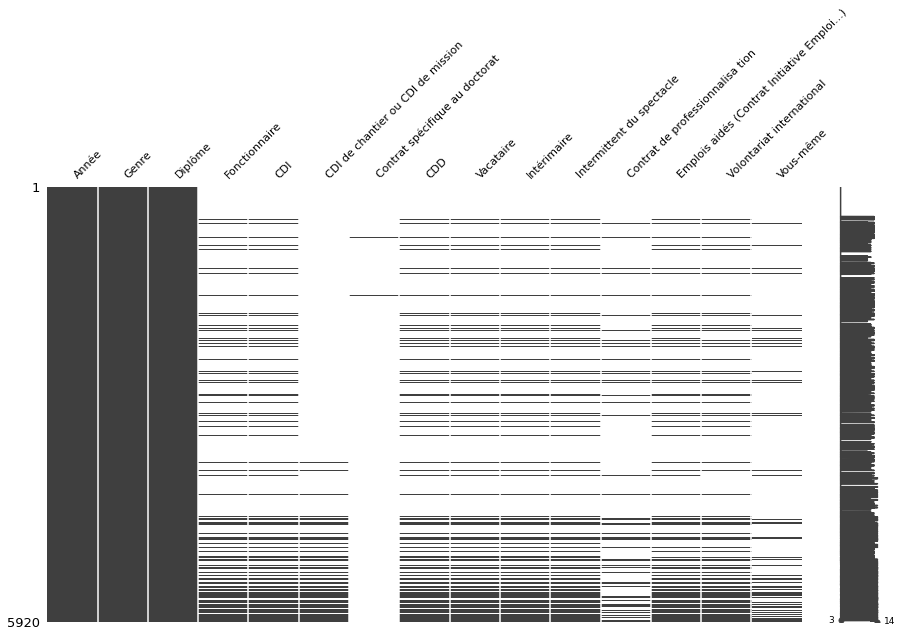

In [1072]:
# Recherche des valeurs manquantes par type de contrats
msno.matrix(df_contrat, fontsize=11, figsize=(15,8))
plt.show()

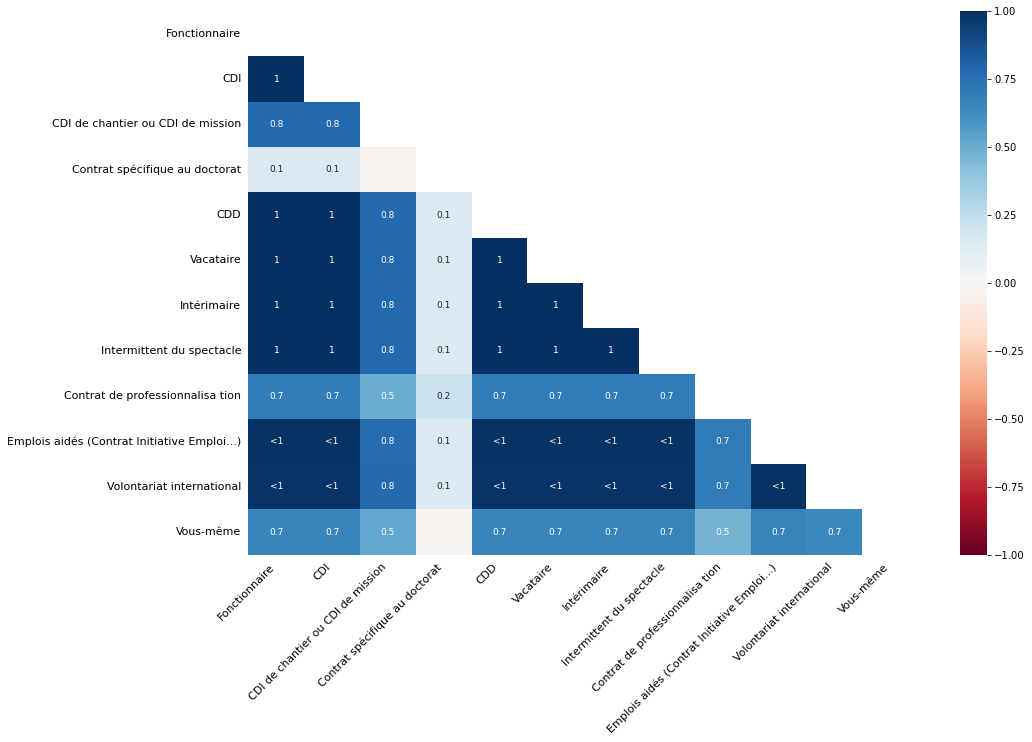

In [1073]:
msno.heatmap(df_contrat, fontsize=11, figsize=(15,10))
plt.show()

In [1074]:
# Remplacement des valeurs manquantes, non significatives ou non communiquées par la valeur 0
df = df.replace([pd.NA, "ns", "nd"], 0)

In [1075]:
# Changement de type pour les variables indiquant des valeurs de type numérique
df["Année"] = df["Année"].astype(int)
df = df.iloc[:, 0:3].join(df.iloc[:, 3:].astype(int))

In [1076]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 56 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Année                                                                  5920 non-null   int64 
 1   Genre                                                                  5920 non-null   object
 2   Diplôme                                                                5920 non-null   object
 3   Fonctionnaire                                                          5920 non-null   int64 
 4   CDI                                                                    5920 non-null   int64 
 5   CDI de chantier ou CDI de mission                                      5920 non-null   int64 
 6   Contrat spécifique au doctorat                                         5920 non-null   int64 
 7

In [1077]:
# Sélection des lignes à valeurs manquantes diplomes + secteurs
rows_na = df[df.iloc[:, 3:].sum(axis=1, numeric_only=True) == 0].index

In [1078]:
# Suppression des lignes diplôme + secteurs dont le nombre est nul. 
df = df.drop(rows_na)

In [1079]:
# renommage de la variable "Contrat de professionnalisa tion"
df.rename(columns={"Contrat de professionnalisa tion": "Contrat de professionnalisation"}, inplace=True)

In [1080]:
df.sort_values("Année", inplace=True)

In [1081]:
# Sélection des contrats
df_contrat = df.iloc[:, 0:15]

In [1082]:
df_contrat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 2948 to 5916
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Année                                       1289 non-null   int64 
 1   Genre                                       1289 non-null   object
 2   Diplôme                                     1289 non-null   object
 3   Fonctionnaire                               1289 non-null   int64 
 4   CDI                                         1289 non-null   int64 
 5   CDI de chantier ou CDI de mission           1289 non-null   int64 
 6   Contrat spécifique au doctorat              1289 non-null   int64 
 7   CDD                                         1289 non-null   int64 
 8   Vacataire                                   1289 non-null   int64 
 9   Intérimaire                                 1289 non-null   int64 
 10  Intermittent du spect

In [1083]:
# Calcul du nombre de chacun des contrats par année 
contrat_count = df_contrat.groupby(["Année", "Diplôme"]).sum()

In [1084]:
# Nombre total de contrat par année et par diplôme
contrat_count["total"] = contrat_count.sum(axis=1)

In [1085]:
contrat_count.reset_index(inplace=True)

In [1086]:
contrat_count.head()

,Année,Diplôme,Fonctionnaire,CDI,CDI de chantier ou CDI de mission,Contrat spécifique au doctorat,CDD,Vacataire,Intérimaire,Intermittent du spectacle,Contrat de professionnalisation,Emplois aidés (Contrat Initiative Emploi…),Volontariat international,Vous-même,total
0,2013,DUT,117,1286,0,0,597,13,122,6,23,48,2,40,2254
1,2013,LICENCE PRO,139,2184,0,0,881,16,143,29,8,73,1,51,3525
2,2013,MASTER ENS,164,12,0,0,18,2,0,0,0,1,0,0,197
3,2013,MASTER LMD,202,2020,0,0,1001,45,84,26,0,35,39,68,3520
4,2014,DUT,216,1318,0,0,731,19,141,4,42,43,0,32,2546


In [1087]:
# Total du nombre de contrats par année, par diplôme et par type de contrat 
df_contrat_tt = contrat_count.melt(id_vars=["Année", "Diplôme", "total"], value_vars=contrat_count.columns[2:], var_name="contrat", value_name="nb")

In [1088]:
df_contrat_tt

,Année,Diplôme,total,contrat,nb
0,2013,DUT,2254,Fonctionnaire,117
1,2013,LICENCE PRO,3525,Fonctionnaire,139
2,2013,MASTER ENS,197,Fonctionnaire,164
3,2013,MASTER LMD,3520,Fonctionnaire,202
4,2014,DUT,2546,Fonctionnaire,216
...,...,...,...,...,...
319,2018,MASTER LMD,8721,Vous-même,150
320,2019,DUT,10869,Vous-même,271
321,2019,LICENCE PRO,18506,Vous-même,479
322,2019,MASTER ENS,597,Vous-même,3


In [1089]:
# Pourcentage d'insertion pour chaque type de contrat par année
df_contrat_tt["%"] = (round(df_contrat_tt["nb"] / df_contrat_tt["total"] * 100, 1)).fillna(0)

In [1090]:
df_contrat_tt

,Année,Diplôme,total,contrat,nb,%
0,2013,DUT,2254,Fonctionnaire,117,5.2
1,2013,LICENCE PRO,3525,Fonctionnaire,139,3.9
2,2013,MASTER ENS,197,Fonctionnaire,164,83.2
3,2013,MASTER LMD,3520,Fonctionnaire,202,5.7
4,2014,DUT,2546,Fonctionnaire,216,8.5
...,...,...,...,...,...,...
319,2018,MASTER LMD,8721,Vous-même,150,1.7
320,2019,DUT,10869,Vous-même,271,2.5
321,2019,LICENCE PRO,18506,Vous-même,479,2.6
322,2019,MASTER ENS,597,Vous-même,3,0.5


In [1091]:
df_graph = df_contrat_tt.pivot_table(index=["Année"], values="%", columns="contrat")

In [1092]:
df_graph.head()

contrat,CDD,CDI,CDI de chantier ou CDI de mission,Contrat de professionnalisation,Contrat spécifique au doctorat,Emplois aidés (Contrat Initiative Emploi…),Fonctionnaire,Intermittent du spectacle,Intérimaire,Vacataire,Volontariat international,Vous-même
Année,,,,,,,,,,,,
2013,22.250,45.650,0.000,0.300,0.0,1.425,24.50,0.450,2.975,0.850,0.300,1.275
2014,23.400,44.550,0.000,0.500,0.0,1.125,24.50,0.350,3.150,0.800,0.375,1.200
2015,22.150,45.525,0.000,0.425,0.0,1.150,24.75,0.375,3.325,0.725,0.375,1.175
2016,21.025,46.650,0.000,0.550,0.0,0.550,24.85,0.500,3.150,0.600,0.400,1.725
2017,20.925,48.150,0.225,0.475,0.0,0.100,24.05,0.375,2.750,0.750,0.425,1.700


In [1093]:
# Changement de l'ordre des colonnes selon la valeur maximale de chacune d'entre elles.
col_order = df_graph.max().sort_values().index

In [1094]:
# Calcul de l'écart type par année
errors = df_graph.std(axis=1)

In [1095]:
errors 

Année
2013    14.647153
2014    14.503271
2015    14.639735
2016    14.822389
2017    15.118379
2018    14.838930
2019    14.937755
dtype: float64

In [1096]:
# Axe des ordonnées. Récupération des valeurs de chaque type de contrat depuis un dictionnaire
y = df_graph[col_order].to_dict('list').values()

# Axes abscisses en année
x = df_graph.index

# Nombre de variables à stacker
nb_var = df_graph.shape[1]

labels = col_order

In [1097]:
# Définition des couleurs 
colors = [  "cornflowerblue", "mediumslateblue", "gold", 
            "orange", "brown", "darksalmon", 
            "peru", "mediumseagreen", "teal", 
            "slategray", "green", "tan"]

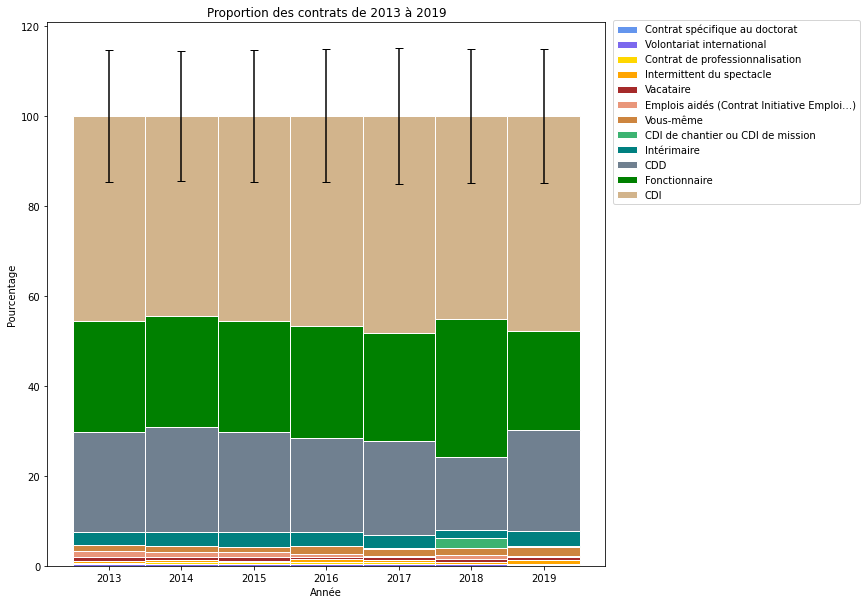

In [1098]:

# Création du stacked Barplot
fig, ax = plt.subplots(figsize=(10,10))
# liste des pourcentages par année pour tout niveau de diplôme confondu
for n, height in enumerate(y):
    if n == nb_var - 1:
        # Indication de l'écart type sur le dernier stack
        ax.bar(x, height, width=1, bottom=bottom, yerr=errors, edgecolor='white', label=labels[n], capsize=4, color=colors[n])
    elif n > 0:
        # création du stack courant avec pour base le sommet du précedent
        ax.bar(x, height, width=1, bottom=bottom, edgecolor='white', label=labels[n], color=colors[n])
        # la base du nouveau stack est le sommet du précédent stack 
        bottom = np.add(bottom, height).tolist()
    else:
        # Création de la première barre
        ax.bar(x, height, width=1, edgecolor='white', label=labels[n], color=colors[n])
        # initialisation de la base du 1er stack
        bottom = height
        
fig.legend(bbox_to_anchor=(1.26, 0.89))
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des contrats de 2013 à 2019")
plt.show()

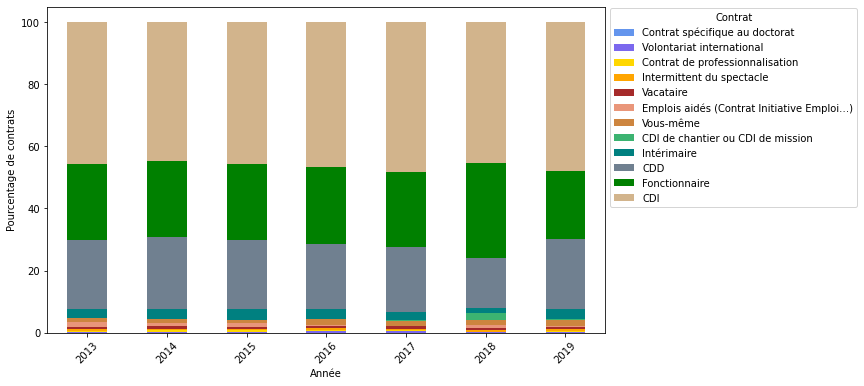

In [1099]:
# Graphique du pourcentage par type de contrats selon l'année
fig, ax = plt.subplots()
df_graph[col_order].plot(kind="bar", stacked=True, figsize=(10, 6), ax=ax, color=colors)
plt.legend(title="Contrat", bbox_to_anchor=(1, 1.01))
plt.xticks(rotation=45)
plt.ylabel("Pourcentage de contrats")
plt.show()

In [1100]:
# Graphs intégrant le niveau du diplôme
df_graph = df_contrat_tt.pivot_table(index=["Année", "Diplôme"], values="%", columns="contrat")

In [1101]:
df_graph.reset_index("Diplôme", inplace=True)

In [1102]:
df_graph.head()

contrat,Diplôme,CDD,CDI,CDI de chantier ou CDI de mission,Contrat de professionnalisation,Contrat spécifique au doctorat,Emplois aidés (Contrat Initiative Emploi…),Fonctionnaire,Intermittent du spectacle,Intérimaire,Vacataire,Volontariat international,Vous-même
Année,,,,,,,,,,,,,
2013,DUT,26.5,57.1,0.0,1.0,0.0,2.1,5.2,0.3,5.4,0.6,0.1,1.8
2013,LICENCE PRO,25.0,62.0,0.0,0.2,0.0,2.1,3.9,0.8,4.1,0.5,0.0,1.4
2013,MASTER ENS,9.1,6.1,0.0,0.0,0.0,0.5,83.2,0.0,0.0,1.0,0.0,0.0
2013,MASTER LMD,28.4,57.4,0.0,0.0,0.0,1.0,5.7,0.7,2.4,1.3,1.1,1.9
2014,DUT,28.7,51.8,0.0,1.6,0.0,1.7,8.5,0.2,5.5,0.7,0.0,1.3


In [1103]:
df_graph[df_graph["Diplôme"] == "DUT"]

contrat,Diplôme,CDD,CDI,CDI de chantier ou CDI de mission,Contrat de professionnalisation,Contrat spécifique au doctorat,Emplois aidés (Contrat Initiative Emploi…),Fonctionnaire,Intermittent du spectacle,Intérimaire,Vacataire,Volontariat international,Vous-même
Année,,,,,,,,,,,,,
2013,DUT,26.5,57.1,0.0,1.0,0.0,2.1,5.2,0.3,5.4,0.6,0.1,1.8
2014,DUT,28.7,51.8,0.0,1.6,0.0,1.7,8.5,0.2,5.5,0.7,0.0,1.3
2015,DUT,28.5,52.4,0.0,1.3,0.0,2.2,6.9,0.2,6.3,0.7,0.2,1.4
2016,DUT,26.2,55.7,0.0,2.0,0.0,1.1,5.9,0.2,6.7,0.2,0.2,1.8
2017,DUT,25.8,57.3,0.0,1.6,0.0,0.2,6.2,0.0,5.4,1.0,0.2,2.2
2019,DUT,22.5,59.0,0.2,0.6,0.0,0.6,6.8,0.7,6.4,0.6,0.0,2.5


In [1104]:
# Sélection par niveau de diplôme
df1 = df_graph[df_graph["Diplôme"] == "DUT"].iloc[:, 1:]
df2 = df_graph[df_graph["Diplôme"] == "LICENCE PRO"].iloc[:, 1:]
df3 = df_graph[df_graph["Diplôme"] == "MASTER ENS"].iloc[:, 1:]
df4 = df_graph[df_graph["Diplôme"] == "MASTER LMD"].iloc[:, 1:]

In [1105]:
df1

contrat,CDD,CDI,CDI de chantier ou CDI de mission,Contrat de professionnalisation,Contrat spécifique au doctorat,Emplois aidés (Contrat Initiative Emploi…),Fonctionnaire,Intermittent du spectacle,Intérimaire,Vacataire,Volontariat international,Vous-même
Année,,,,,,,,,,,,
2013,26.5,57.1,0.0,1.0,0.0,2.1,5.2,0.3,5.4,0.6,0.1,1.8
2014,28.7,51.8,0.0,1.6,0.0,1.7,8.5,0.2,5.5,0.7,0.0,1.3
2015,28.5,52.4,0.0,1.3,0.0,2.2,6.9,0.2,6.3,0.7,0.2,1.4
2016,26.2,55.7,0.0,2.0,0.0,1.1,5.9,0.2,6.7,0.2,0.2,1.8
2017,25.8,57.3,0.0,1.6,0.0,0.2,6.2,0.0,5.4,1.0,0.2,2.2
2019,22.5,59.0,0.2,0.6,0.0,0.6,6.8,0.7,6.4,0.6,0.0,2.5


In [1106]:
# Ajout de l'année 2018 manquante pour le niveau DUT
df1.loc[2018] = [0] * (df1.shape[1])

In [1107]:
df1.sort_index(inplace=True)

In [1108]:
df1[labels]

contrat,Contrat spécifique au doctorat,Volontariat international,Contrat de professionnalisation,Intermittent du spectacle,Vacataire,Emplois aidés (Contrat Initiative Emploi…),Vous-même,CDI de chantier ou CDI de mission,Intérimaire,CDD,Fonctionnaire,CDI
Année,,,,,,,,,,,,
2013,0.0,0.1,1.0,0.3,0.6,2.1,1.8,0.0,5.4,26.5,5.2,57.1
2014,0.0,0.0,1.6,0.2,0.7,1.7,1.3,0.0,5.5,28.7,8.5,51.8
2015,0.0,0.2,1.3,0.2,0.7,2.2,1.4,0.0,6.3,28.5,6.9,52.4
2016,0.0,0.2,2.0,0.2,0.2,1.1,1.8,0.0,6.7,26.2,5.9,55.7
2017,0.0,0.2,1.6,0.0,1.0,0.2,2.2,0.0,5.4,25.8,6.2,57.3
2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,0.0,0.0,0.6,0.7,0.6,0.6,2.5,0.2,6.4,22.5,6.8,59.0


In [1109]:
# Calcul de l'écart type par année pour chaque niveau de diplôme
errors1 = df1.std(axis=1)
errors2 = df2.std(axis=1)
errors3 = df3.std(axis=1)
errors4 = df4.std(axis=1)

In [1110]:
df1.loc[2018, "CDI"] = 0

In [1111]:
# définitions des axes des abscisses pour chaque niveau de diplôme
x1 = df1.index
x2, x3, x4 = df2.index, df3.index, df4.index

In [1112]:
errors1

Année
2013    17.037310
2014    15.908164
2015    16.009569
2016    16.634757
2017    17.038306
2018     0.000000
2019    17.190490
dtype: float64

In [1113]:
# Définition des ordonnées par type de niveau de diplôme
df1 = df1[labels].to_dict('list').values()
df2 = df2[labels].to_dict('list').values()
df3 = df3[labels].to_dict('list').values()
df4 = df4[labels].to_dict('list').values()

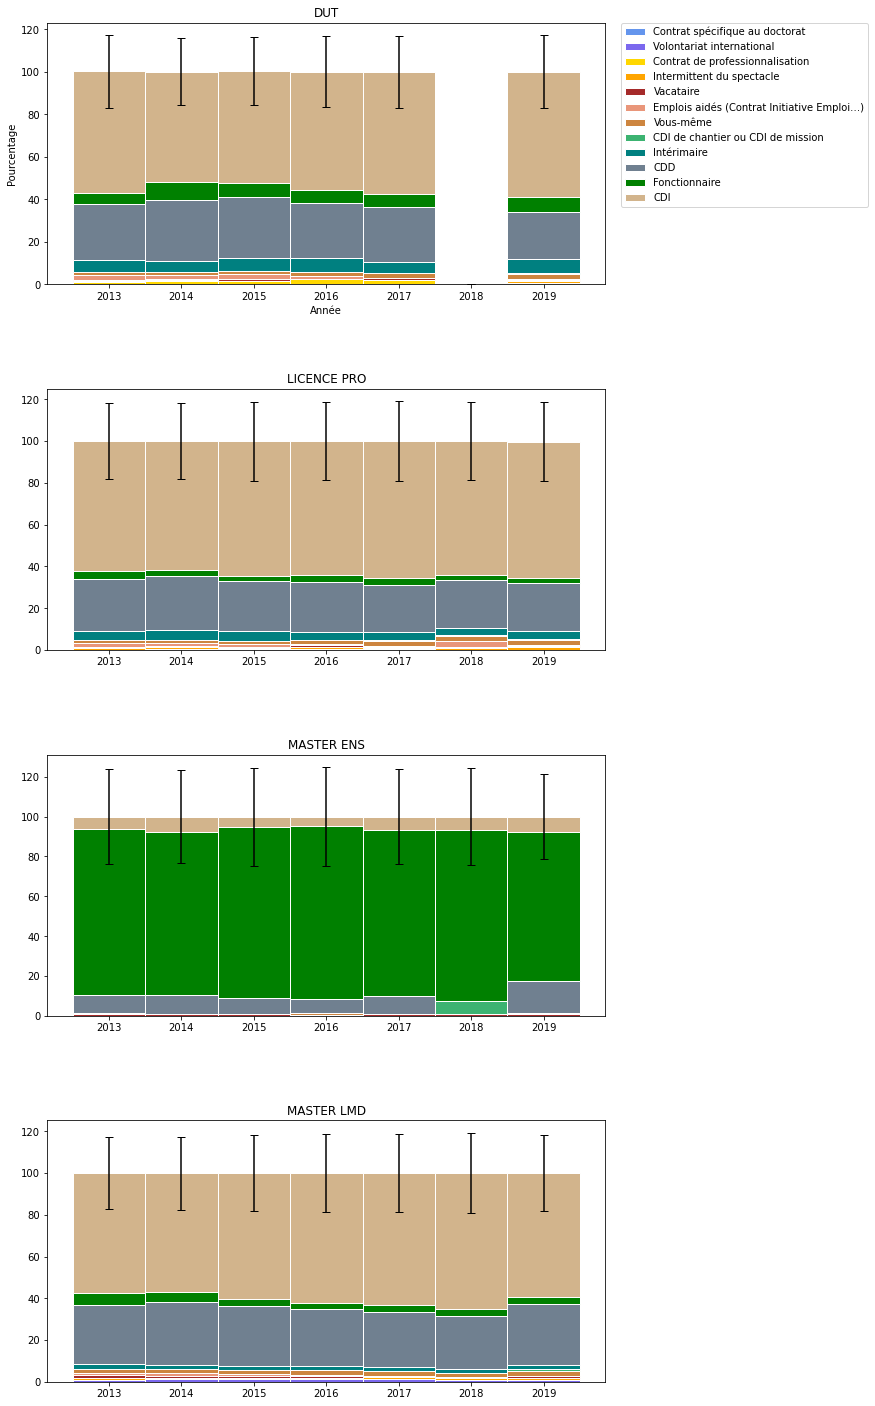

In [1114]:
### Création du stacked Barplot ###
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,25), sharex=False)
# Chargement des ordonnées pour chaque niveau de diplôme
for n, (y1, y2, y3, y4) in enumerate(zip(df1, df2, df3, df4)):
    if n == nb_var - 1:
        # Indication de l'écart type sur le dernier stack
        ax1.bar(x1, y1, width=1, bottom=bottom1, yerr=errors1, edgecolor='white', label=labels[n], capsize=4, color=colors[n])
        ax2.bar(x2, y2, width=1, bottom=bottom2, yerr=errors2, edgecolor='white', label=labels[n], capsize=4, color=colors[n])
        ax3.bar(x3, y3, width=1, bottom=bottom3, yerr=errors3, edgecolor='white', label=labels[n], capsize=4, color=colors[n])
        ax4.bar(x4, y4, width=1, bottom=bottom4, yerr=errors4, edgecolor='white', label=labels[n], capsize=4, color=colors[n])
    elif n > 0:
        # création du stack courant avec pour base le sommet du précedent
        ax1.bar(x1, y1, width=1, bottom=bottom1, edgecolor='white', label=labels[n], color=colors[n])
        ax2.bar(x2, y2, width=1, bottom=bottom2, edgecolor='white', label=labels[n], color=colors[n])
        ax3.bar(x3, y3, width=1, bottom=bottom3, edgecolor='white', label=labels[n], color=colors[n])
        ax4.bar(x4, y4, width=1, bottom=bottom4, edgecolor='white', label=labels[n], color=colors[n])
        # la base du nouveau stack est le sommet du précédent stack 
        bottom1 = np.add(bottom1, y1).tolist()
        bottom2 = np.add(bottom2, y2).tolist()
        bottom3 = np.add(bottom3, y3).tolist()
        bottom4 = np.add(bottom4, y4).tolist()
    else:
        # Création de la première barre
        ax1.bar(x1, y1, width=1, edgecolor='white', label=labels[n], color=colors[n])
        ax2.bar(x2, y2, width=1, edgecolor='white', label=labels[n], color=colors[n])
        ax3.bar(x3, y3, width=1, edgecolor='white', label=labels[n], color=colors[n])
        ax4.bar(x4, y4, width=1, edgecolor='white', label=labels[n], color=colors[n])
        # initialisation de la base du 1er stack
        bottom1, bottom2, bottom3, bottom4 = y1, y2, y3, y4
        
ax1.legend(bbox_to_anchor=(1.02, 1.02))
# Titre des graphs
ax1.set_title("DUT")
ax2.set_title("LICENCE PRO")
ax3.set_title("MASTER ENS")
ax4.set_title("MASTER LMD")

ax1.set_xlabel("Année")
ax1.set_ylabel("Pourcentage")

# Décalage de chacun des graphs vers la bas 
plt.subplots_adjust(hspace=0.4)
plt.show()

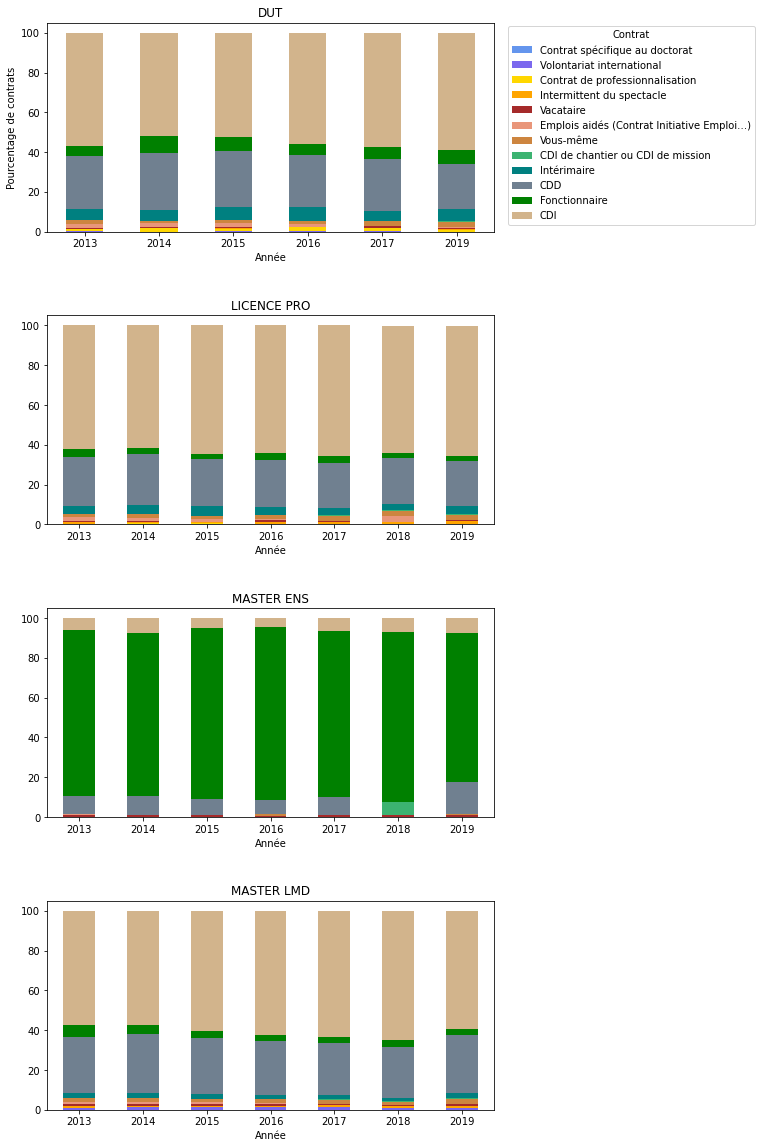

In [1115]:
# Sélection par diplôme
df1 = df_graph[df_graph["Diplôme"] == "DUT"]
df2 = df_graph[df_graph["Diplôme"] == "LICENCE PRO"]
df3 = df_graph[df_graph["Diplôme"] == "MASTER ENS"]
df4 = df_graph[df_graph["Diplôme"] == "MASTER LMD"]
# Création des graphs
fig, (ax1,ax2, ax3, ax4) = plt.subplots(4, 1, sharex=False,figsize = (8, 20))
df1[col_order].plot(kind="bar", stacked=True, ax=ax1, legend=True, rot=0, color=colors)
df2[col_order].plot(kind="bar", stacked=True, ax=ax2, legend=False, rot=0, color=colors)
df3[col_order].plot(kind="bar", stacked=True, ax=ax3, legend=False, rot=0, color=colors)
df4[col_order].plot(kind="bar", stacked=True, ax=ax4, legend=False, rot=0, color=colors)
ax1.set_ylabel("Pourcentage de contrats")
# Legende des graphs
ax1.legend(title="Contrat", bbox_to_anchor=(1.02, 1.01))
# Titre des graphs
ax1.set_title("DUT")
ax2.set_title("LICENCE PRO")
ax3.set_title("MASTER ENS")
ax4.set_title("MASTER LMD")
# Décalage de chacun des graphs vers la bas 
plt.subplots_adjust(hspace=0.4)
plt.show()

In [1116]:
# Sélection des variables correspondant aux métiers
df_metier = ins_prof.iloc[:, 32:89]



2. Etude de l'insertion professionnelle des doctorants

In [1117]:
ins_prof_doctorat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 21 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Année d’obtention                                                                240 non-null    int64  
 1   Diplôme                                                                          240 non-null    object 
 2   Situation                                                                        240 non-null    object 
 3   Discipline principale agrégée                                                    240 non-null    object 
 4   Discipline principale                                                            240 non-null    object 
 5   Genre                                                                            240 non-null    object 
 6   Nombre de 

In [1118]:
ins_prof_doctorat.rename(columns=
                            {"Répartition des docteurs en emploi dans le secteur académique": "secteur académique",
                            "Répartition des docteurs en emploi dans le public hors secteur académique": "public hors secteur académique",
                            "Répartition des docteurs en emploi dans la R&D privée": "R&D privée",
                            "Répartition des docteurs en emploi dans le privé hors secteur académique et R&D": "privé hors secteur académique et R&D",
                            "1er quartile du salaire net mensuel des emplois à temps plein": "1er quartile du salaire net mensuel",
                            "Salaire net mensuel médian des emplois à temps plein": "Salaire net mensuel médian",
                            "3ème quartile du salaire net mensuel des emplois à temps plein": "3ème quartile du salaire net mensuel"},
                            inplace=True)

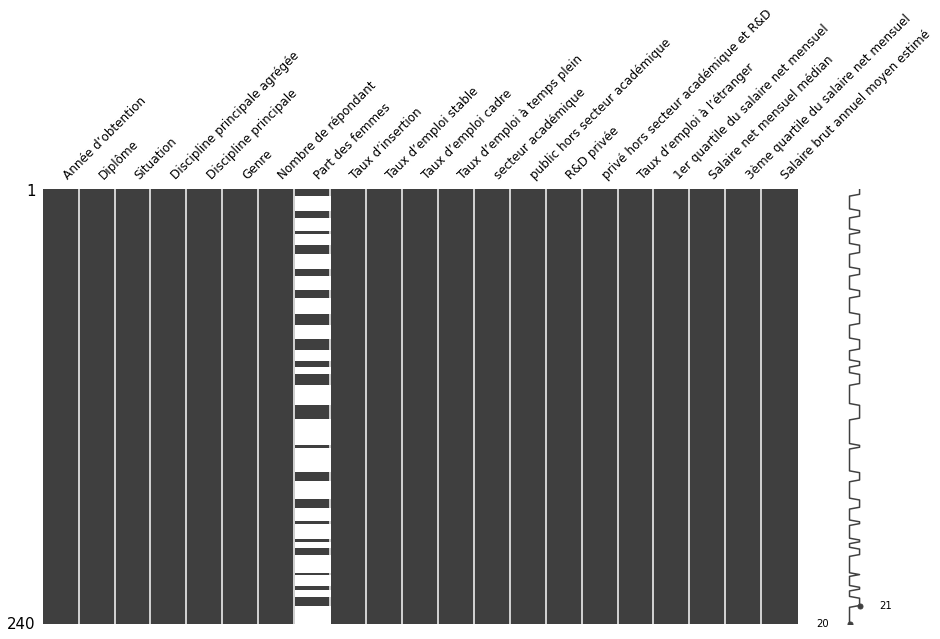

In [1119]:
msno.matrix(ins_prof_doctorat, fontsize=12, figsize=(15,8))
plt.show()

In [1120]:
# Trie par Genre
df_sort = ins_prof_doctorat.sort_values("Genre")

In [1121]:
df_sort.head()

,Année d’obtention,Diplôme,Situation,Discipline principale agrégée,Discipline principale,Genre,Nombre de répondant,Part des femmes,Taux d’insertion,Taux d’emploi stable,...,Taux d’emploi à temps plein,secteur académique,public hors secteur académique,R&D privée,privé hors secteur académique et R&D,Taux d’emploi à l’étranger,1er quartile du salaire net mensuel,Salaire net mensuel médian,3ème quartile du salaire net mensuel,Salaire brut annuel moyen estimé
188,2016,DOCTORAT,12 mois après le diplôme,Sciences de la société,Sciences économiques et de gestion,femmes,174,NaN,90,62,...,91,61,20,6,13,29,1880,2200,2800,36107
61,2014,DOCTORAT,12 mois après le diplôme,Sciences et leurs interactions,Mathématiques et leurs interactions,femmes,103,NaN,87,45,...,95,57,17,11,15,42,ns,ns,ns,ns
60,2014,DOCTORAT,12 mois après le diplôme,Ensemble Sciences et leurs interactions,Sciences et leurs interactions,femmes,996,NaN,86,50,...,97,47,11,20,22,36,1895,2160,2438,32000
131,2016,DOCTORAT,12 mois après le diplôme,Sciences du vivant,Sciences agronomiques et écologiques,femmes,144,NaN,78,35,...,96,63,17,10,11,36,ns,ns,ns,ns
130,2016,DOCTORAT,12 mois après le diplôme,Sciences et leurs interactions,Sciences et TIC,femmes,186,NaN,86,60,...,96,51,6,28,15,29,2000,2300,2617,36936


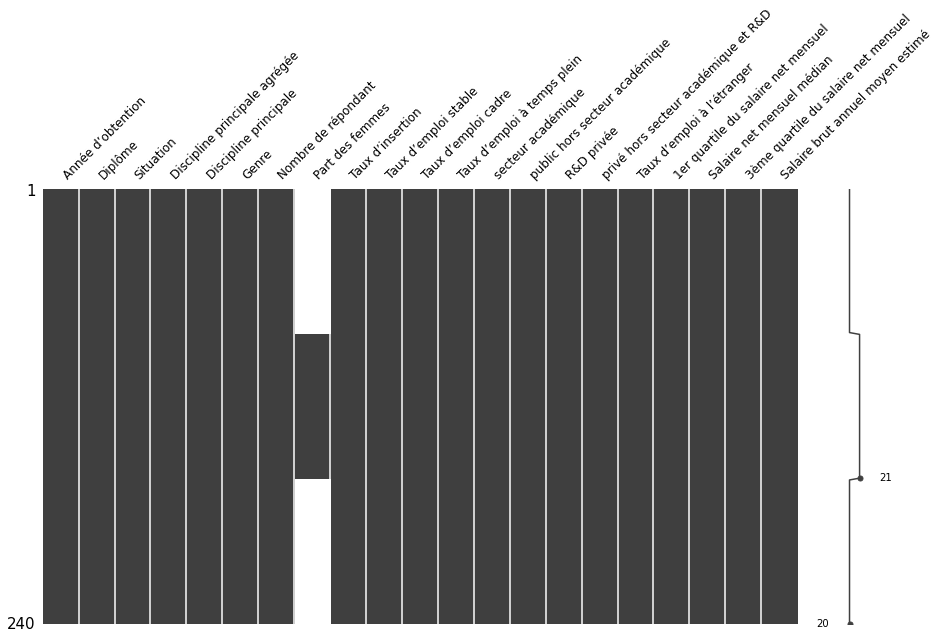

In [1122]:
msno.matrix(df_sort, fontsize=12, figsize=(15,8))
plt.show()

In [1123]:
### Correction du nombre manquant de part par genre ###

# Mise à zero du pourcentage de femmes pour le genre homme
ins_prof_doctorat.loc[ins_prof_doctorat["Genre"] == "hommes", "Part des femmes"] = 0

# Remplacement des lignes du pourcentage de femmes à valeur manquante par 100 %
ins_prof_doctorat.loc[ins_prof_doctorat["Part des femmes"].isna(), "Part des femmes"] = 100

In [1124]:
ins_prof_doctorat.sort_values(["Année d’obtention", "Situation", "Discipline principale"], inplace=True)

In [1125]:
ins_prof_doctorat.head()

,Année d’obtention,Diplôme,Situation,Discipline principale agrégée,Discipline principale,Genre,Nombre de répondant,Part des femmes,Taux d’insertion,Taux d’emploi stable,...,Taux d’emploi à temps plein,secteur académique,public hors secteur académique,R&D privée,privé hors secteur académique et R&D,Taux d’emploi à l’étranger,1er quartile du salaire net mensuel,Salaire net mensuel médian,3ème quartile du salaire net mensuel,Salaire brut annuel moyen estimé
19,2014,DOCTORAT,12 mois après le diplôme,Sciences du vivant,"Biologie, médecine et santé",hommes,552,0.0,87,39,...,96,68,13,8,11,40,1851,2188,3007,31920
109,2014,DOCTORAT,12 mois après le diplôme,Sciences du vivant,"Biologie, médecine et santé",femmes,719,100.0,82,32,...,93,64,17,8,11,34,1867,2108,2531,30000
171,2014,DOCTORAT,12 mois après le diplôme,Sciences du vivant,"Biologie, médecine et santé",femmes et hommes,1271,55.0,84,36,...,95,66,16,8,10,36,1867,2125,2720,30492
12,2014,DOCTORAT,12 mois après le diplôme,Sciences et leurs interactions,Chimie et sciences des matériaux,femmes et hommes,769,45.0,81,45,...,98,52,9,22,17,38,1875,2125,2323,31000
18,2014,DOCTORAT,12 mois après le diplôme,Sciences et leurs interactions,Chimie et sciences des matériaux,hommes,452,0.0,81,46,...,97,53,8,23,16,38,1875,2125,2345,30492


In [1126]:
# colonnes des pourcentages
percent_col = ins_prof_doctorat.columns[7:17] 

# total de personnes pour chaque discipline par année
total = ins_prof_doctorat["Nombre de répondant"]

# Convertion des taux en nombre de personnes
for col in percent_col:
    ins_prof_doctorat["nb_" + col] = round(total * (ins_prof_doctorat[col] / 100), 2)


In [1127]:
ins_prof_doctorat.head()

,Année d’obtention,Diplôme,Situation,Discipline principale agrégée,Discipline principale,Genre,Nombre de répondant,Part des femmes,Taux d’insertion,Taux d’emploi stable,...,nb_Part des femmes,nb_Taux d’insertion,nb_Taux d’emploi stable,nb_Taux d’emploi cadre,nb_Taux d’emploi à temps plein,nb_secteur académique,nb_public hors secteur académique,nb_R&D privée,nb_privé hors secteur académique et R&D,nb_Taux d’emploi à l’étranger
19,2014,DOCTORAT,12 mois après le diplôme,Sciences du vivant,"Biologie, médecine et santé",hommes,552,0.0,87,39,...,0.00,480.24,215.28,518.88,529.92,375.36,71.76,44.16,60.72,220.80
109,2014,DOCTORAT,12 mois après le diplôme,Sciences du vivant,"Biologie, médecine et santé",femmes,719,100.0,82,32,...,719.00,589.58,230.08,654.29,668.67,460.16,122.23,57.52,79.09,244.46
171,2014,DOCTORAT,12 mois après le diplôme,Sciences du vivant,"Biologie, médecine et santé",femmes et hommes,1271,55.0,84,36,...,699.05,1067.64,457.56,1169.32,1207.45,838.86,203.36,101.68,127.10,457.56
12,2014,DOCTORAT,12 mois après le diplôme,Sciences et leurs interactions,Chimie et sciences des matériaux,femmes et hommes,769,45.0,81,45,...,346.05,622.89,346.05,730.55,753.62,399.88,69.21,169.18,130.73,292.22
18,2014,DOCTORAT,12 mois après le diplôme,Sciences et leurs interactions,Chimie et sciences des matériaux,hommes,452,0.0,81,46,...,0.00,366.12,207.92,424.88,438.44,239.56,36.16,103.96,72.32,171.76


In [1128]:
# Selection des lignes indiquant la somme des répondants par situation et par genre (Ensemble)
ensemble = ins_prof_doctorat[ins_prof_doctorat["Discipline principale"] == "Ensemble"].index
# Supression des lignes contenant "Ensemble"
ins_prof_doctorat = ins_prof_doctorat.drop(ensemble)

In [1129]:
# Nombre de personnes par disciplines et par année pour chaque secteur d'insertion professionnel 
df_secteur = ins_prof_doctorat.groupby(
    ["Année d’obtention", "Discipline principale", "Genre"])[[
        "Nombre de répondant", 
        "nb_Part des femmes", "nb_secteur académique", 
        "nb_public hors secteur académique", "nb_R&D privée",
        "nb_privé hors secteur académique et R&D", "nb_Taux d’emploi à l’étranger"]].sum()

In [1130]:
df_secteur.head()

Nombre de répondant  \
Année d’obtention Discipline principale            Genre                                   
2014              Biologie, médecine et santé      femmes                           1438   
                                                   femmes et hommes                 2542   
                                                   hommes                           1104   
                  Chimie et sciences des matériaux femmes                            634   
                                                   femmes et hommes                 1538   

                                                                     nb_Part des femmes  \
Année d’obtention Discipline principale            Genre                                  
2014              Biologie, médecine et santé      femmes                        1438.0   
                                                   femmes et hommes              1398.1   
                                                   hommes                           0.0   
                  Chimie et sciences des matériaux femmes                         634.0   
                                                   femmes et hommes               692.1   

                                                                     nb_secteur académique  \
Année d’obtention Discipline principale            Genre                                     
2014              Biologie, médecine et santé      femmes                           913.13   
                                                   femmes et hommes                1652.30   
                                                   hommes                           739.68   
                  Chimie et sciences des matériaux femmes                           278.96   
                                                   femmes et hommes                 722.86   

                                                                     nb_public hors secteur académique  \
Année d’obtention Discipline principale            Genre                                                 
2014              Biologie, médecine et santé      femmes                                       208.51   
                                                   femmes et hommes                             355.88   
                                                   hommes                                       132.48   
                  Chimie et sciences des matériaux femmes                                        79.25   
                                                   femmes et hommes                             153.80   

                                                                     nb_R&D privée  \
Année d’obtention Discipline principale            Genre                             
2014              Biologie, médecine et santé      femmes                    143.8   
                                                   femmes et hommes          254.2   
                                                   hommes                    110.4   
                  Chimie et sciences des matériaux femmes                    158.5   
                                                   femmes et hommes          384.5   

                                                                     nb_privé hors secteur académique et R&D  \
Année d’obtention Discipline principale            Genre                                                       
2014              Biologie, médecine et santé      femmes                                             172.56   
                                                   femmes et hommes                                   279.62   
                                                   hommes                                             121.44   
                  Chimie et sciences des matériaux femmes                                             117.29   
                                                   femmes et hommes                                   276.84 

In [1131]:
# Indication du nombre total de personne pour chaque discipline par année
df_genre = df_secteur.pivot_table(columns=["Genre"], values="Nombre de répondant", index=["Année d’obtention", "Discipline principale"])

In [1132]:
df_genre = df_genre[["femmes", "hommes", "femmes et hommes"]]

In [1133]:
df_genre.head(20)

Genre                                                           femmes  \
Année d’obtention Discipline principale                                  
2014              Biologie, médecine et santé                     1438   
                  Chimie et sciences des matériaux                 634   
                  Histoire, géographie                             382   
                  Langues et littératures                          406   
                  Mathématiques et leurs interactions              206   
                  Philosophie et arts                              202   
                  Physique                                         292   
                  Sciences agronomiques et écologiques             234   
                  Sciences de la société                           966   
                  Sciences de la terre et de l’univers, espace     224   
                  Sciences du vivant                              1672   
                  Sciences et TIC                                  336   
                  Sciences et leurs interactions                  1992   
                  Sciences humaines                                352   
                  Sciences humaines et humanités                  1342   
                  Sciences juridiques et politiques                376   
                  Sciences pour l’ingénieur                        300   
                  Sciences sociales, sociologie, démographie       242   
                  Sciences économiques et de gestion               348   
2016              Biologie, médecine et santé                     1674   

Genre                                                           hommes  \
Année d’obtention Discipline principale                                  
2014              Biologie, médecine et santé                     1104   
                  Chimie et sciences des matériaux                 904   
                  Histoire, géographie                             340   
                  Langues et littératures                          208   
                  Mathématiques et leurs interactions              522   
                  Philosophie et arts                              184   
                  Physique                                         794   
                  Sciences agronomiques et écologiques             216   
                  Sciences de la société                           938   
                  Sciences de la terre et de l’univers, espace     350   
                  Sciences du vivant                              1320   
                  Sciences et TIC                                 1188   
                  Sciences et leurs interactions                  4832   
                  Sciences humaines                                316   
                  Sciences humaines et humanités                  1048   
                  Sciences juridiques et politiques                390   
                  Sciences pour l’ingénieur                       1074   
                  Sciences sociales, sociologie, démographie       184   
                  Sciences économiques et de gestion               364   
2016              Biologie, médecine et santé                     1308   

Genre                                                           femmes et hommes  
Année d’obtention Discipline principale                                           
2014              Biologie, médecine et santé                               2542  
                  Chimie et sciences des matériaux                          1538  
                  Histoire, géographie                                       722  
                  Langues et littératures                                    614  
                  Mathématiques et leurs interactions                        728  
                  Philosophie et arts                                        386  
                  Physique                                                  10

In [1134]:
# Indication du total du nombre de personnes pour l'ensemble des genres dans toutes les disciplines
df = df_secteur.merge(df_genre[["femmes et hommes"]], on=["Année d’obtention", "Discipline principale"])

In [1135]:
df.head()

Nombre de répondant  \
Année d’obtention Discipline principale                                   
2014              Biologie, médecine et santé                      1438   
                  Biologie, médecine et santé                      2542   
                  Biologie, médecine et santé                      1104   
                  Chimie et sciences des matériaux                  634   
                  Chimie et sciences des matériaux                 1538   

                                                    nb_Part des femmes  \
Année d’obtention Discipline principale                                  
2014              Biologie, médecine et santé                   1438.0   
                  Biologie, médecine et santé                   1398.1   
                  Biologie, médecine et santé                      0.0   
                  Chimie et sciences des matériaux               634.0   
                  Chimie et sciences des matériaux               692.1   

                                                    nb_secteur académique  \
Année d’obtention Discipline principale                                     
2014              Biologie, médecine et santé                      913.13   
                  Biologie, médecine et santé                     1652.30   
                  Biologie, médecine et santé                      739.68   
                  Chimie et sciences des matériaux                 278.96   
                  Chimie et sciences des matériaux                 722.86   

                                                    nb_public hors secteur académique  \
Année d’obtention Discipline principale                                                 
2014              Biologie, médecine et santé                                  208.51   
                  Biologie, médecine et santé                                  355.88   
                  Biologie, médecine et santé                                  132.48   
                  Chimie et sciences des matériaux                              79.25   
                  Chimie et sciences des matériaux                             153.80   

                                                    nb_R&D privée  \
Année d’obtention Discipline principale                             
2014              Biologie, médecine et santé               143.8   
                  Biologie, médecine et santé               254.2   
                  Biologie, médecine et santé               110.4   
                  Chimie et sciences des matériaux          158.5   
                  Chimie et sciences des matériaux          384.5   

                                                    nb_privé hors secteur académique et R&D  \
Année d’obtention Discipline principale                                                       
2014              Biologie, médecine et santé                                        172.56   
                  Biologie, médecine et santé                                        279.62   
                  Biologie, médecine et santé                                        121.44   
                  Chimie et sciences des matériaux                                   117.29   
                  Chimie et sciences des matériaux                                   276.84   

                                                    nb_Taux d’emploi à l’étranger  \
Année d’obtention Discipline principale                                             
2014              Biologie, médecine et santé                              503.30   
                  Biologie, médecine et santé                              927.83   
                  Biologie, médecine et santé                              436.08   
                  Chimie et sciences des matériaux                         234.58   
                  Chimie et sciences des matériaux                         569.06   

                                                    femmes et hommes  
Année d’obtention Discipli

In [1136]:
# Ajout de la variable indiquant le genre par discipline
df["Genre"] = df_secteur.index.get_level_values(2) 
df_secteur = df.copy()
df_secteur.rename(columns={"femmes et hommes": "total/discipline"}, inplace=True)

In [1137]:
df_secteur.reset_index("Discipline principale", inplace=True)

In [1138]:
# Total des hommes et des femmes pour l'ensemble des disciplines
total_disciplines = df_secteur.loc[df_secteur["Genre"] == "femmes et hommes"].groupby("Année d’obtention")[["total/discipline"]].sum()

In [1139]:
total_disciplines.rename(columns={"total/discipline": "total/année"}, inplace=True)

In [1140]:
total_disciplines.head()

,total/année
Année d’obtention,
2014,28220
2016,33116


In [1141]:
# Indication du total pour l'ensemble des disciplines par année pour chaque discipline
df_secteur = df_secteur.merge(total_disciplines, on="Année d’obtention")

In [1142]:
df_secteur.head()

,Discipline principale,Nombre de répondant,nb_Part des femmes,nb_secteur académique,nb_public hors secteur académique,nb_R&D privée,nb_privé hors secteur académique et R&D,nb_Taux d’emploi à l’étranger,total/discipline,Genre,total/année
Année d’obtention,,,,,,,,,,,
2014,"Biologie, médecine et santé",1438,1438.0,913.13,208.51,143.8,172.56,503.30,2542,femmes,28220
2014,"Biologie, médecine et santé",2542,1398.1,1652.30,355.88,254.2,279.62,927.83,2542,femmes et hommes,28220
2014,"Biologie, médecine et santé",1104,0.0,739.68,132.48,110.4,121.44,436.08,2542,hommes,28220
2014,Chimie et sciences des matériaux,634,634.0,278.96,79.25,158.5,117.29,234.58,1538,femmes,28220
2014,Chimie et sciences des matériaux,1538,692.1,722.86,153.80,384.5,276.84,569.06,1538,femmes et hommes,28220


In [1143]:
# Réordonnancement des colonnes
col_order = df_secteur.columns[-3:].to_list() + df_secteur.columns[0:7].to_list()
df_secteur = df_secteur[col_order]

In [1144]:
df_secteur.head()

,total/discipline,Genre,total/année,Discipline principale,Nombre de répondant,nb_Part des femmes,nb_secteur académique,nb_public hors secteur académique,nb_R&D privée,nb_privé hors secteur académique et R&D
Année d’obtention,,,,,,,,,,
2014,2542,femmes,28220,"Biologie, médecine et santé",1438,1438.0,913.13,208.51,143.8,172.56
2014,2542,femmes et hommes,28220,"Biologie, médecine et santé",2542,1398.1,1652.30,355.88,254.2,279.62
2014,2542,hommes,28220,"Biologie, médecine et santé",1104,0.0,739.68,132.48,110.4,121.44
2014,1538,femmes,28220,Chimie et sciences des matériaux,634,634.0,278.96,79.25,158.5,117.29
2014,1538,femmes et hommes,28220,Chimie et sciences des matériaux,1538,692.1,722.86,153.80,384.5,276.84


In [1145]:
# Sélection des colonnes indiquant le nombre de personnes par secteur
col_secteur = df_secteur.columns[4:]

In [1146]:
# Pourcentage pour chaque secteur et discipline
for col in col_secteur:
    df_secteur["%_" + col] = round(df_secteur[col].loc[[2014, 2016]] / total_disciplines.loc[[2014, 2016], "total/année"] * 100, 2)

In [1147]:
df_secteur.head()

,total/discipline,Genre,total/année,Discipline principale,Nombre de répondant,nb_Part des femmes,nb_secteur académique,nb_public hors secteur académique,nb_R&D privée,nb_privé hors secteur académique et R&D,%_Nombre de répondant,%_nb_Part des femmes,%_nb_secteur académique,%_nb_public hors secteur académique,%_nb_R&D privée,%_nb_privé hors secteur académique et R&D
Année d’obtention,,,,,,,,,,,,,,,,
2014,2542,femmes,28220,"Biologie, médecine et santé",1438,1438.0,913.13,208.51,143.8,172.56,5.10,5.10,3.24,0.74,0.51,0.61
2014,2542,femmes et hommes,28220,"Biologie, médecine et santé",2542,1398.1,1652.30,355.88,254.2,279.62,9.01,4.95,5.86,1.26,0.90,0.99
2014,2542,hommes,28220,"Biologie, médecine et santé",1104,0.0,739.68,132.48,110.4,121.44,3.91,0.00,2.62,0.47,0.39,0.43
2014,1538,femmes,28220,Chimie et sciences des matériaux,634,634.0,278.96,79.25,158.5,117.29,2.25,2.25,0.99,0.28,0.56,0.42
2014,1538,femmes et hommes,28220,Chimie et sciences des matériaux,1538,692.1,722.86,153.80,384.5,276.84,5.45,2.45,2.56,0.55,1.36,0.98


In [1148]:
col_percent = df_secteur.columns[12:]
df_graph = df_secteur.reset_index()
df_graph = df_graph.melt(   
    id_vars=["Année d’obtention", "Discipline principale", "Genre"], 
    value_vars=col_percent,
    var_name="secteur",
    value_name="%"
    )

In [1149]:
df_graph

,Année d’obtention,Discipline principale,Genre,secteur,%
0,2014,"Biologie, médecine et santé",femmes,%_nb_secteur académique,3.24
1,2014,"Biologie, médecine et santé",femmes et hommes,%_nb_secteur académique,5.86
2,2014,"Biologie, médecine et santé",hommes,%_nb_secteur académique,2.62
3,2014,Chimie et sciences des matériaux,femmes,%_nb_secteur académique,0.99
4,2014,Chimie et sciences des matériaux,femmes et hommes,%_nb_secteur académique,2.56
...,...,...,...,...,...
451,2016,"Sciences sociales, sociologie, démographie",femmes et hommes,%_nb_privé hors secteur académique et R&D,0.30
452,2016,"Sciences sociales, sociologie, démographie",hommes,%_nb_privé hors secteur académique et R&D,0.09
453,2016,Sciences économiques et de gestion,femmes,%_nb_privé hors secteur académique et R&D,0.17
454,2016,Sciences économiques et de gestion,femmes et hommes,%_nb_privé hors secteur académique et R&D,0.48


In [1150]:
# Suppression des indications du type "%_nb_" pour les secteurs
df_graph["secteur"] = df_graph["secteur"].str.replace("%_nb_", "", regex=True)

In [1151]:
# Selection des genres
df_graph_genre = df_graph[(df_graph["Genre"] == "hommes") | (df_graph["Genre"] == "femmes")]

In [1152]:
# Selection de l'ensemble des femmes et des hommes
df_graph_full = df_graph[df_graph["Genre"] == "femmes et hommes"]

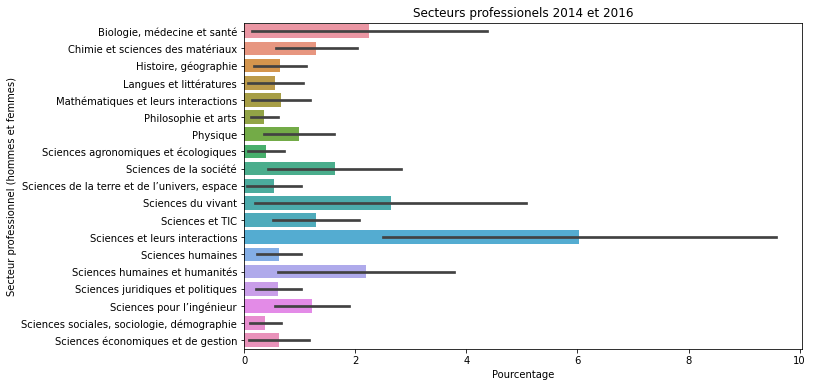

In [1153]:
# Représentation des répartitions dans les différents secteurs professionnel pour l'ensemble des genres
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(
    data=df_graph_full, 
    y="Discipline principale", 
    x="%", 
    errorbar="sd", 
    ax=ax)

ax.set_title("Secteurs professionels 2014 et 2016")
ax.set_xlabel("Pourcentage")
ax.set_ylabel("Secteur professionnel (hommes et femmes)")
plt.xticks()
plt.show()

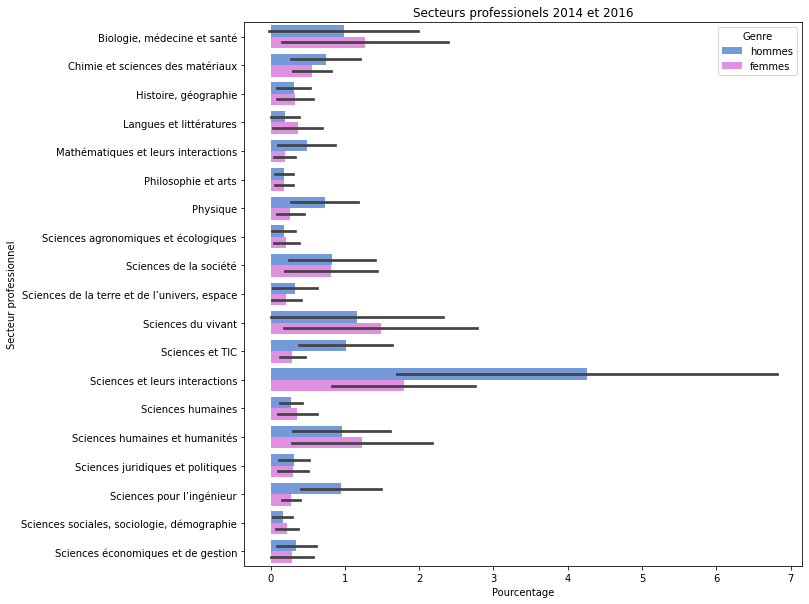

In [1154]:
# Représentation des répartitions dans les différents secteurs professionnels par genre
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(
    data=df_graph_genre, 
    y="Discipline principale", 
    x="%", 
    hue="Genre",
    hue_order=["hommes", "femmes"],
    palette=["cornflowerblue", "violet"],
    errorbar="sd", 
    ax=ax)

ax.set_title("Secteurs professionels 2014 et 2016")
ax.set_xlabel("Pourcentage")
ax.set_ylabel("Secteur professionnel")
plt.xticks()
plt.show()